# BIKE RENTAL PREDICTION

The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime

# Load datasets
hour_df = pd.read_csv('/Users/sarahmoin/Downloads/Python tech test/hour.csv')
day_df = pd.read_csv('/Users/sarahmoin/Downloads/Python tech test/day.csv')


In [292]:
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06/01/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07/01/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08/01/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09/01/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10/01/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [61]:
day_df.shape

(731, 16)

### Exploratory Data Analysis

In [62]:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [63]:
#Rename the columns
day_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [64]:
day_df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Convert to categorical values

In [65]:
day_df['datetime']=pd.to_datetime(day_df.datetime)

day_df['season']=day_df.season.astype('category')
day_df['year']=day_df.year.astype('category')
day_df['month']=day_df.month.astype('category')
day_df['holiday']=day_df.holiday.astype('category')
day_df['weekday']=day_df.weekday.astype('category')
day_df['workingday']=day_df.workingday.astype('category')
day_df['weather_condition']=day_df.weather_condition.astype('category')

/var/folders/d_/v9lsqhp162z2r6djdgwcwnk80000gn/T/ipykernel_54175/3198230697.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day_df['datetime']=pd.to_datetime(day_df.datetime)


Describing the dataset

In [66]:
day_df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [67]:
day_df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [296]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Distribution of Total Count

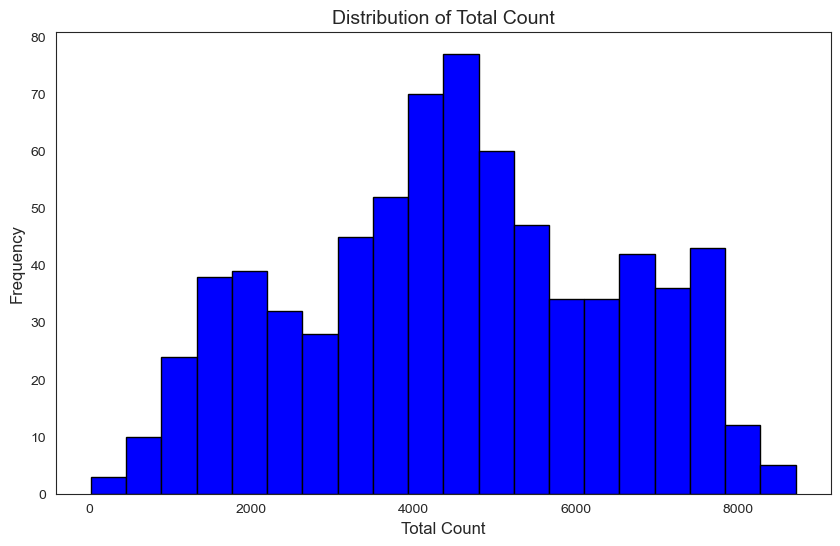

In [297]:
import matplotlib.pyplot as plt

# Create a histogram for the 'total_count' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(day_df['cnt'], bins=20, color='blue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Total Count', fontsize=14)
plt.xlabel('Total Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


Monthly distribution of counts

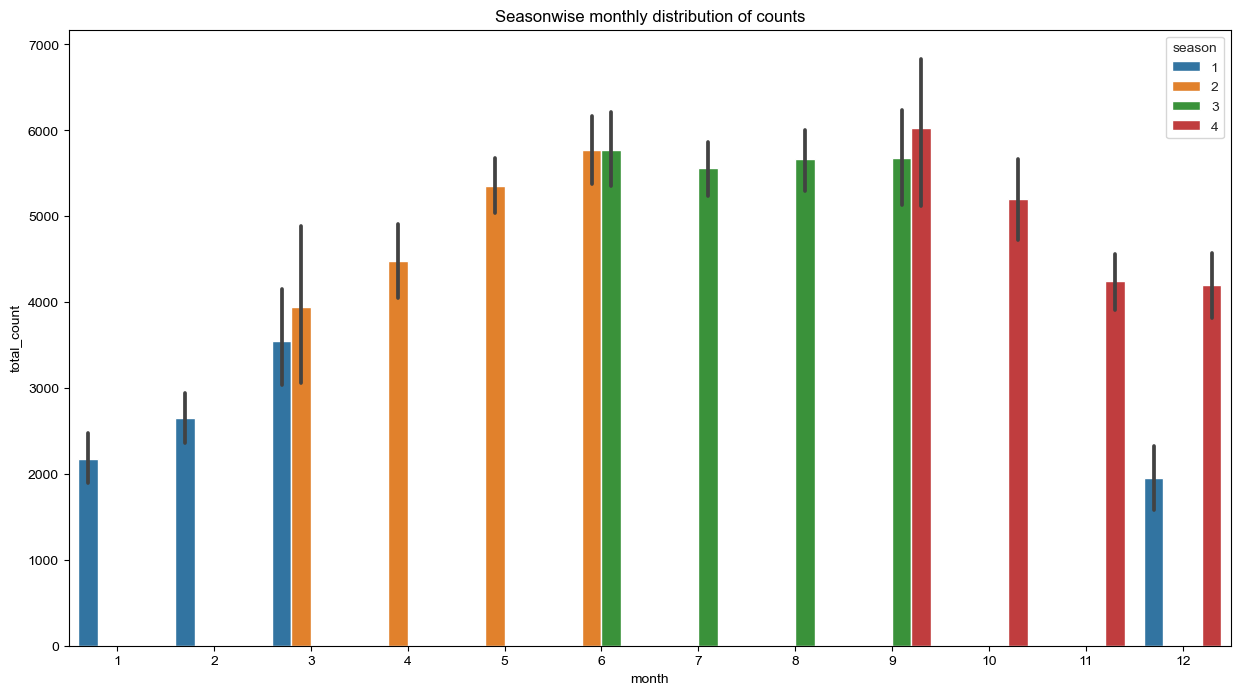

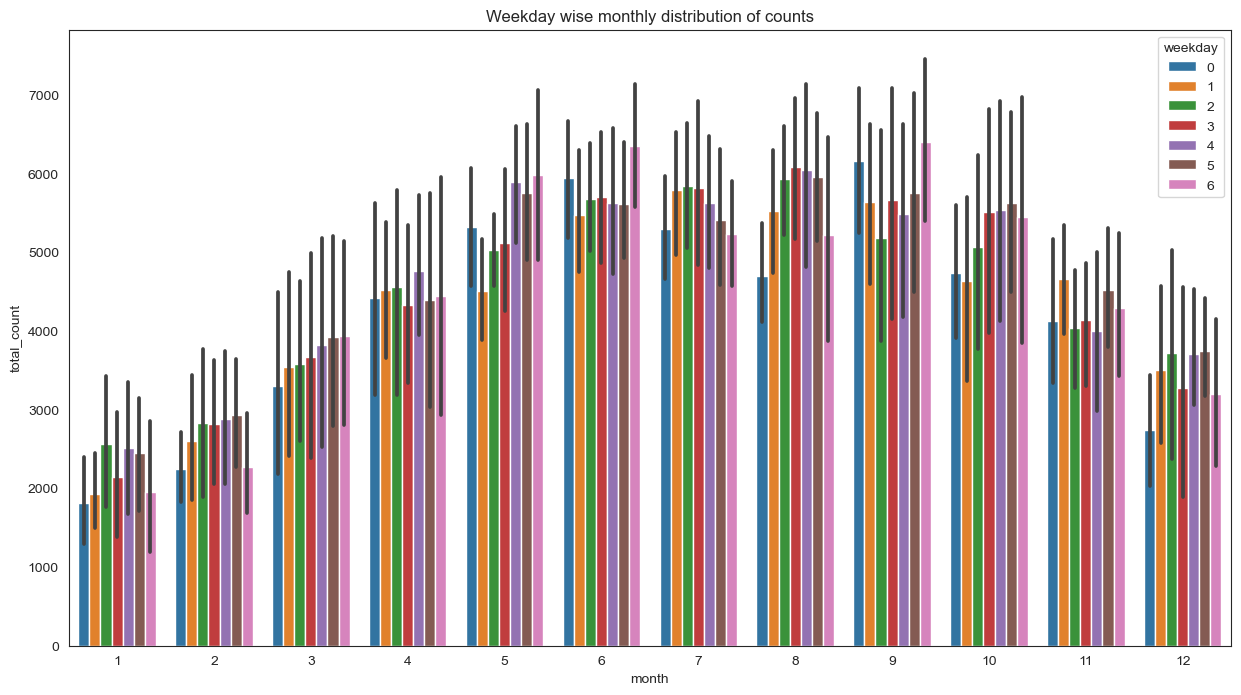

In [68]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=day_df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=day_df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

Yearly distribution of counts

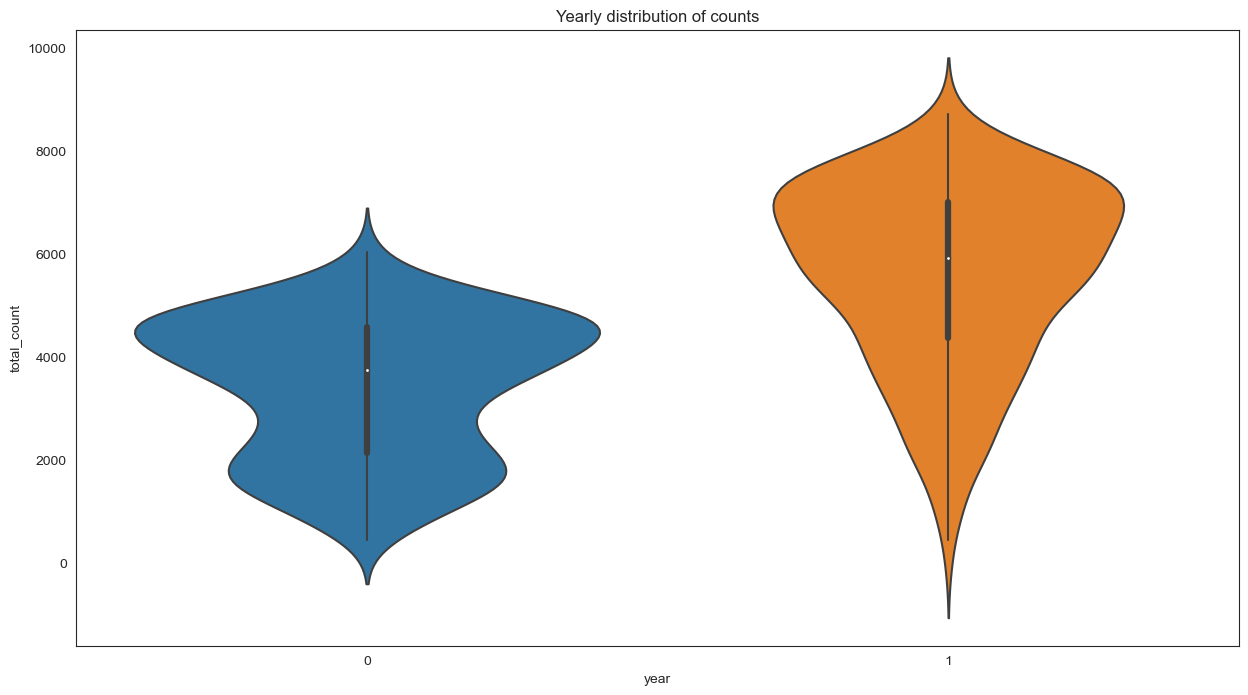

In [70]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='total_count',data=day_df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

Workingday wise distribution of counts Wrt Months

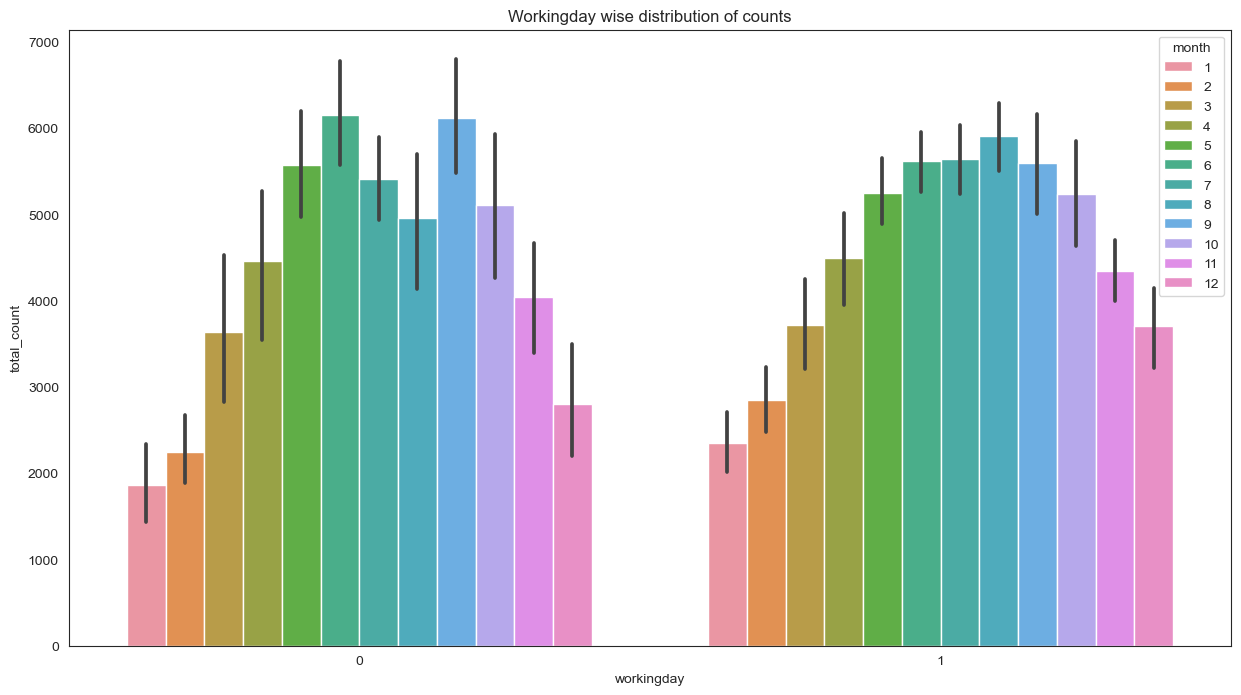

In [75]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=day_df,x='workingday',y='total_count',hue='month')
ax.set_title('Workingday wise distribution of counts')
plt.show()

Holiday wise distribution of counts wrt Season

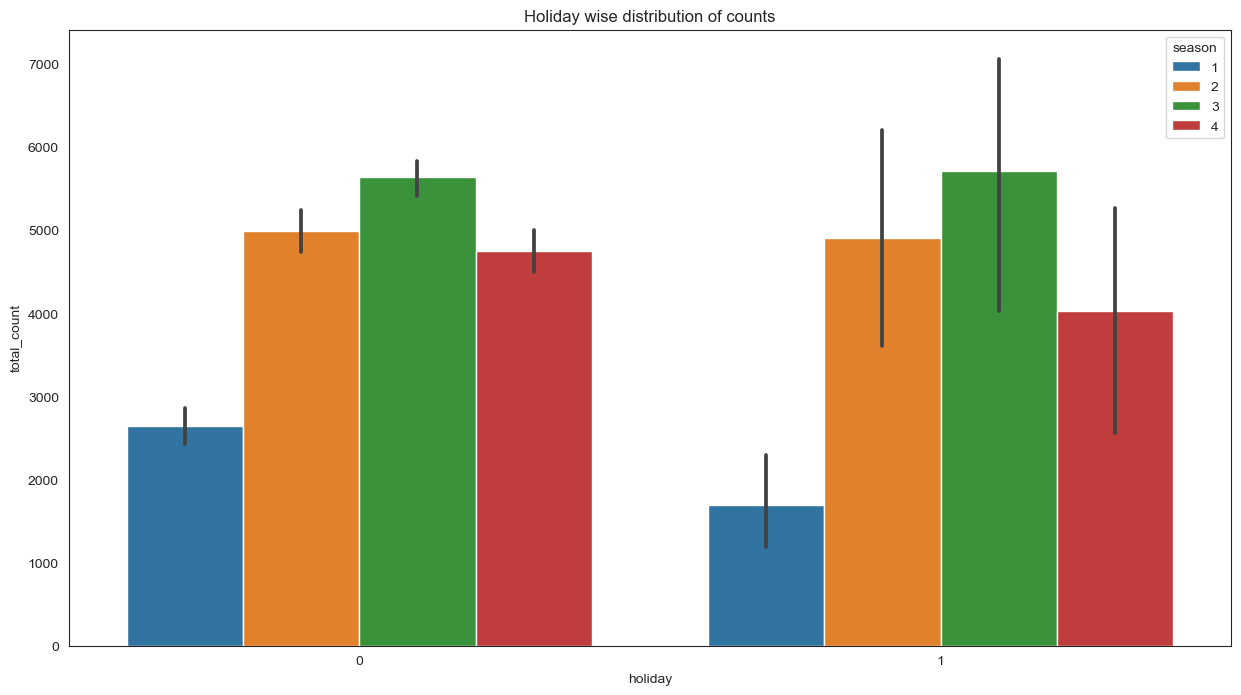

In [73]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=day_df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

Holiday wise distribution of counts wrt weather conditions

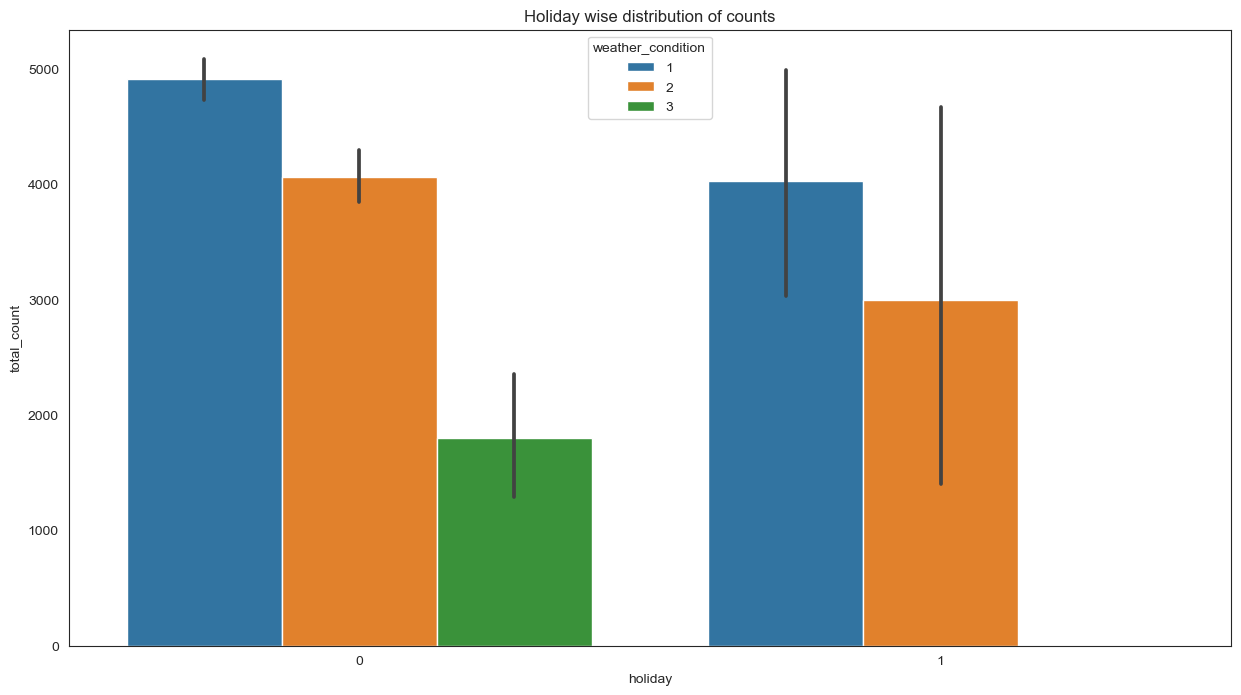

In [76]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=day_df,x='holiday',y='total_count',hue='weather_condition')
ax.set_title('Holiday wise distribution of counts')
plt.show()

QQ PLOT: A Q-Q (Quantile-Quantile) plot is a graphical tool to assess if a dataset follows a particular distribution, typically a normal distribution.

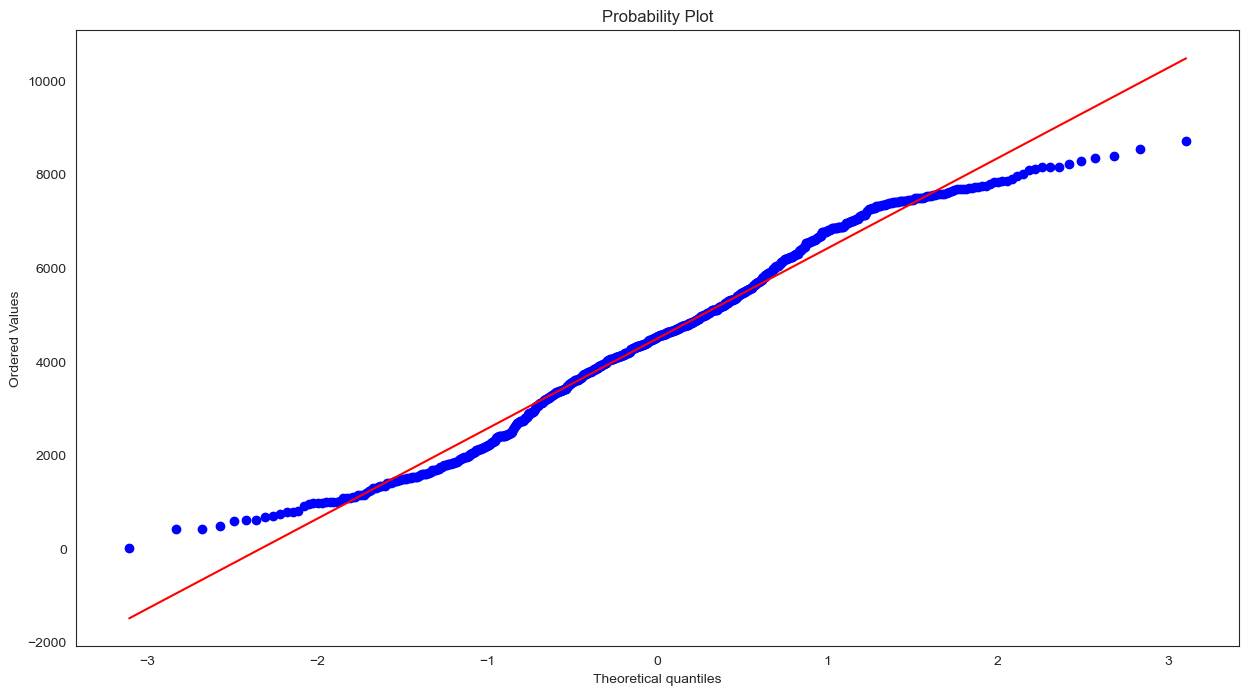

In [77]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(day_df.total_count.tolist(),dist='norm',plot=plt)
plt.show()

Correlation matrix

/var/folders/d_/v9lsqhp162z2r6djdgwcwnk80000gn/T/ipykernel_54175/4117643076.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = day_df.corr()


               rec_id      temp     atemp  humidity  windspeed    casual  \
rec_id       1.000000  0.150580  0.152638  0.016375  -0.112620  0.275255   
temp         0.150580  1.000000  0.991702  0.126963  -0.157944  0.543285   
atemp        0.152638  0.991702  1.000000  0.139988  -0.183643  0.543864   
humidity     0.016375  0.126963  0.139988  1.000000  -0.248489 -0.077008   
windspeed   -0.112620 -0.157944 -0.183643 -0.248489   1.000000 -0.167613   
casual       0.275255  0.543285  0.543864 -0.077008  -0.167613  1.000000   
registered   0.659623  0.540012  0.544192 -0.091089  -0.217449  0.395282   
total_count  0.628830  0.627494  0.631066 -0.100659  -0.234545  0.672804   

             registered  total_count  
rec_id         0.659623     0.628830  
temp           0.540012     0.627494  
atemp          0.544192     0.631066  
humidity      -0.091089    -0.100659  
windspeed     -0.217449    -0.234545  
casual         0.395282     0.672804  
registered     1.000000     0.945517  
tot

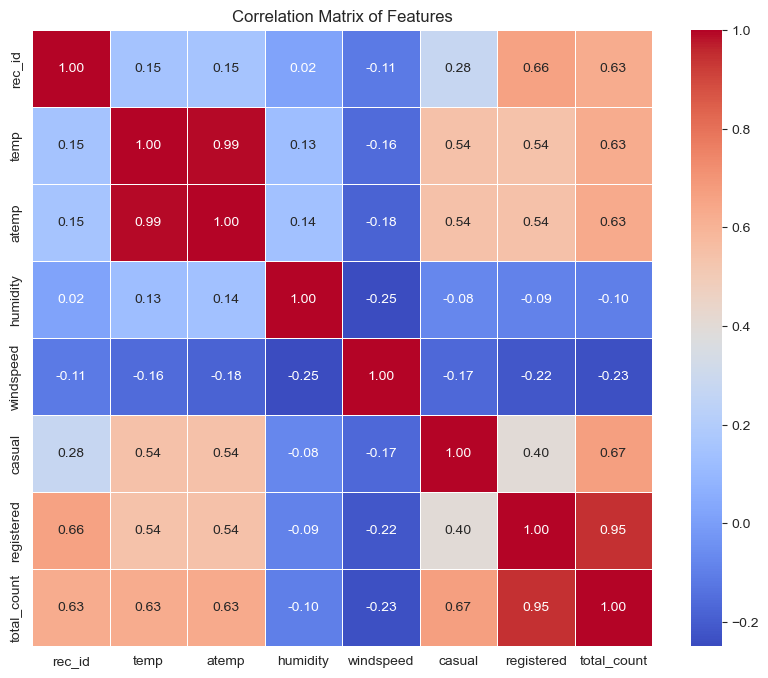

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = day_df.corr()

# Display the correlation matrix
print(corr_matrix)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add title
plt.title('Correlation Matrix of Features')
plt.show()

In [80]:
day_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [82]:
day_df.datetime.min()

Timestamp('2011-01-01 00:00:00')

In [83]:
day_df.datetime.max()

Timestamp('2012-12-31 00:00:00')

In [85]:
day_df.set_index('datetime', inplace=True)

In [233]:
# Select only the 'cnt' column for time series modeling
ts_data = day_df[['season', 'year', 'month', 'weekday',
       'workingday', 'weather_condition', 'temp','casual', 'registered', 'total_count']]



In [234]:
ts_data.head()

,season,year,month,weekday,workingday,weather_condition,temp,casual,registered,total_count
0,1,0,1,6,0,2,0.344167,331,654,985
1,1,0,1,0,0,2,0.363478,131,670,801
2,1,0,1,1,1,1,0.196364,120,1229,1349
3,1,0,1,2,1,1,0.200000,108,1454,1562
4,1,0,1,3,1,1,0.226957,82,1518,1600


In [235]:
ts_data.shape

(731, 10)

### Feature Engineering
Lags have been created in the dataset for past 1 day and 7 day

In [236]:
# Create lag features (e.g., 1-day lag, 7-day lag)
ts_data['cnt_lag_1'] = ts_data['total_count'].shift(1)
ts_data['cnt_lag_7'] = ts_data['total_count'].shift(7)

# Drop rows with NaN values created by lagging
ts_data.dropna(inplace=True)

# Display the data with lag features
ts_data.head()


/var/folders/d_/v9lsqhp162z2r6djdgwcwnk80000gn/T/ipykernel_54175/3776310992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data['cnt_lag_1'] = ts_data['total_count'].shift(1)
/var/folders/d_/v9lsqhp162z2r6djdgwcwnk80000gn/T/ipykernel_54175/3776310992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data['cnt_lag_7'] = ts_data['total_count'].shift(7)
/var/folders/d_/v9lsqhp162z2r6djdgwcwnk80000gn/T/ipykernel_54175/3776310992.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,season,year,month,weekday,workingday,weather_condition,temp,casual,registered,total_count,cnt_lag_1,cnt_lag_7
7,1,0,1,6,0,2,0.165000,68,891,959,1510.0,985.0
8,1,0,1,0,0,1,0.138333,54,768,822,959.0,801.0
9,1,0,1,1,1,1,0.150833,41,1280,1321,822.0,1349.0
10,1,0,1,2,1,2,0.169091,43,1220,1263,1321.0,1562.0
11,1,0,1,3,1,1,0.172727,25,1137,1162,1263.0,1600.0


In [240]:
ts_data.shape

(724, 12)

Label encoding: Handle categorical values by labeling them int meaning full numbers,

In [243]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['season', 'year', 'month', 'weekday', 'workingday', 'weather_condition']

# Create a copy of ts_data to store the encoded values
ts_data_encoded = ts_data.copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    ts_data_encoded[col + '_encoded'] = le.fit_transform(ts_data[col])

# Display the DataFrame with encoded columns
ts_data_encoded


,season,year,month,weekday,workingday,weather_condition,temp,casual,registered,total_count,cnt_lag_1,cnt_lag_7,season_encoded,year_encoded,month_encoded,weekday_encoded,workingday_encoded,weather_condition_encoded
7,1,0,1,6,0,2,0.165000,68,891,959,1510.0,985.0,0,0,0,6,0,1
8,1,0,1,0,0,1,0.138333,54,768,822,959.0,801.0,0,0,0,0,0,0
9,1,0,1,1,1,1,0.150833,41,1280,1321,822.0,1349.0,0,0,0,1,1,0
10,1,0,1,2,1,2,0.169091,43,1220,1263,1321.0,1562.0,0,0,0,2,1,1
11,1,0,1,3,1,1,0.172727,25,1137,1162,1263.0,1600.0,0,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,4,1,2,0.254167,247,1867,2114,441.0,4128.0,0,1,11,4,1,1
727,1,1,12,5,1,2,0.253333,644,2451,3095,2114.0,3623.0,0,1,11,5,1,1
728,1,1,12,6,0,2,0.253333,159,1182,1341,3095.0,1749.0,0,1,11,6,0,1
729,1,1,12,0,0,1,0.255833,364,1432,1796,1341.0,1787.0,0,1,11,0,0,0


In [244]:
ts_data_encoded.shape

(724, 18)

In [245]:
ts_data_encoded.columns

Index(['season', 'year', 'month', 'weekday', 'workingday', 'weather_condition',
       'temp', 'casual', 'registered', 'total_count', 'cnt_lag_1', 'cnt_lag_7',
       'season_encoded', 'year_encoded', 'month_encoded', 'weekday_encoded',
       'workingday_encoded', 'weather_condition_encoded'],
      dtype='object')

Split the data into Target and dependent variables

In [246]:
#Define the features (X) and target (y)
X = ts_data_encoded.drop(columns='total_count')  # Feature set
y = ts_data_encoded['total_count']  # Target variable

In [247]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Modelling

Linear Algebra:

In [248]:
from sklearn.linear_model import LinearRegression
#training model
lr_model=LinearRegression()
#fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

In [249]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Train accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Train accuracy of the model : 1.0
Model coefficients : [ 2.30766859e-13  4.18887147e-13 -3.21060453e-14  2.75657032e-14
 -2.34845656e-13 -4.75038547e-13  2.18631401e-15  1.00000000e+00
  1.00000000e+00  0.00000000e+00 -1.11022302e-16  2.30637341e-13
  4.19655155e-13 -3.19395118e-14  2.72657587e-14 -2.34546976e-13
 -4.75072238e-13]
Model intercept value : 9.094947017729282e-13


Evaluation

Mean square error and R2 score have been calculated.
MSE (Mean Squared Error) is a common metric to evaluate the performance of regression models. It calculates the average of the squared differences between the actual (true) and predicted values.

In [250]:
# Make predictions and evaluate
y_pred = lr_model.predict(X_test)
mse_encoded = mean_squared_error(y_test, y_pred)
r2_score_encoded = lr_model.score(X_test, y_test)

# Print the results with one-hot encoding
print(f"Mean Squared Error (One-Hot): {mse_encoded}")
print(f"R² Score (One-Hot): {r2_score_encoded}")

Mean Squared Error (One-Hot): 8.263703816779052e-25
R² Score (One-Hot): 1.0


Error plot

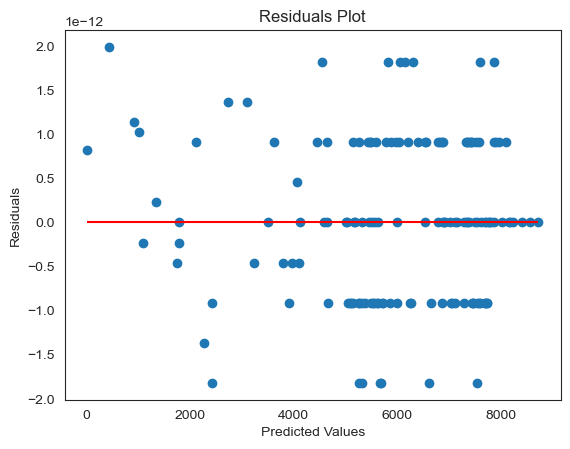

In [251]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Random Forest

In [253]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 111814.21645379311
R-squared: 0.9683311835688072


In [254]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to check the model's performance
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-validated R² Scores: ", cv_scores)
print("Average R² from cross-validation: ", cv_scores.mean())


Cross-validated R² Scores:  [0.98775087 0.98020636 0.9723029  0.94748999 0.96775064]
Average R² from cross-validation:  0.9711001516941264


Error Plot

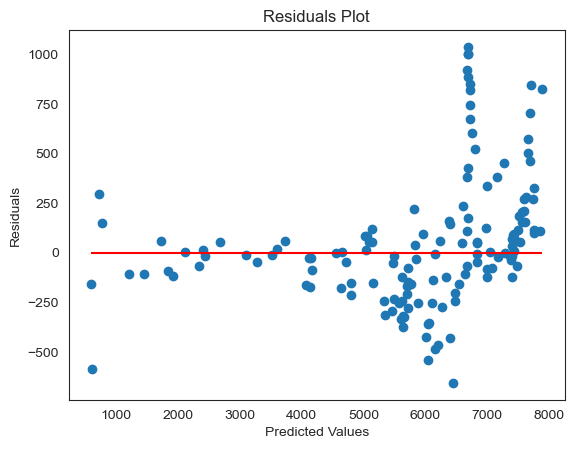

In [255]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Gradient Boosting Regressor

In [256]:
# Initialize the Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 44104.11061910983
R-squared: 0.9875085205857093


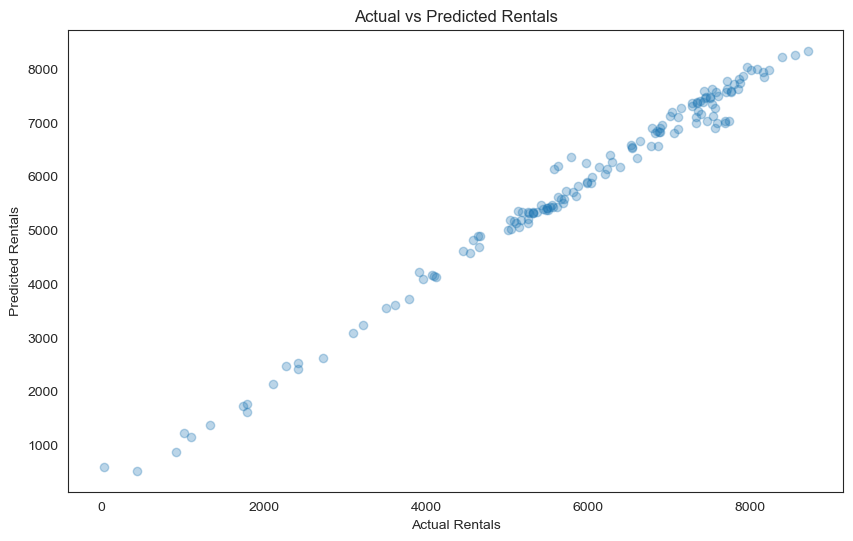

In [257]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Rentals')
plt.show()


Error plot

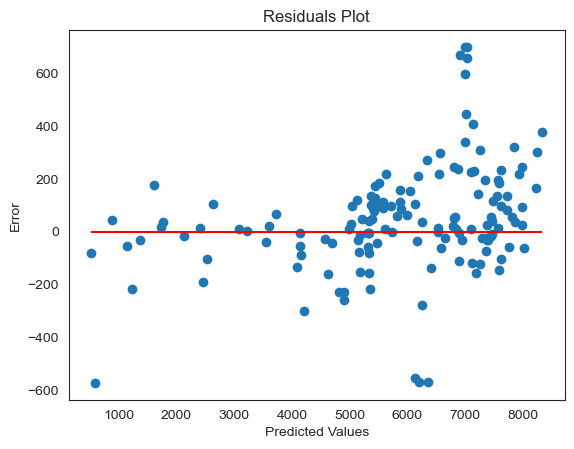

In [258]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Error')
plt.title('Residuals Plot')
plt.show()



### Future Predictions

Creating dataset for the next 30 days and making predictions on it.

In [279]:
# Generate future dates (next 30 days, for example)
from datetime import timedelta
future_days = 30
last_date = pd.to_datetime(day_df['datetime'].max())  
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]

# Use historical averages to fill lag features
average_lag_1 = ts_data['cnt_lag_1'].mean()
average_lag_7 = ts_data['cnt_lag_7'].mean()

# Initialize the future dataframe with simulated features
future_df = pd.DataFrame({
    'season': np.random.choice([1, 2, 3, 4], size=future_days),
    'year':2,
    'month': [d.month for d in future_dates],
    'weekday': [d.weekday() for d in future_dates],
    'workingday': np.random.choice([0, 1], size=future_days),
    'weather_condition': np.random.choice([1, 2, 3], size=future_days),
    'temp': np.random.uniform(0.3, 0.8, size=future_days),
    'casual':np.random.uniform(1, 4000, size=future_days).astype(int),
    'registered':np.random.uniform(1, 7000, size=future_days).astype(int),
    'cnt_lag_1':average_lag_1,
    'cnt_lag_7':average_lag_7
})



Label encoding

In [282]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['season', 'year', 'month', 'weekday', 'workingday', 'weather_condition']

# Create a copy of ts_data to store the encoded values
future_data_encoded = future_df.copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    future_data_encoded[col + '_encoded'] = le.fit_transform(future_df[col])

# Display the DataFrame with encoded columns
future_data_encoded

,season,year,month,weekday,workingday,weather_condition,temp,casual,registered,cnt_lag_1,cnt_lag_7,season_encoded,year_encoded,month_encoded,weekday_encoded,workingday_encoded,weather_condition_encoded
0,1,2,1,1,1,3,0.736837,2031,2728,4533.214088,4530.593923,0,0,0,1,1,2
1,3,2,1,2,0,1,0.459498,2000,5684,4533.214088,4530.593923,2,0,0,2,0,0
2,2,2,1,3,1,3,0.462106,1401,18,4533.214088,4530.593923,1,0,0,3,1,2
3,1,2,1,4,1,3,0.730460,3938,355,4533.214088,4530.593923,0,0,0,4,1,2
4,3,2,1,5,1,1,0.389085,2588,4339,4533.214088,4530.593923,2,0,0,5,1,0
5,1,2,1,6,1,3,0.340596,2336,6819,4533.214088,4530.593923,0,0,0,6,1,2
6,1,2,1,0,0,2,0.702255,612,4606,4533.214088,4530.593923,0,0,0,0,0,1
7,1,2,1,1,1,3,0.545260,3956,2762,4533.214088,4530.593923,0,0,0,1,1,2
8,1,2,1,2,0,1,0.583059,3529,4696,4533.214088,4530.593923,0,0,0,2,0,0
9,3,2,1,3,0,3,0.481915,3306,1720,4533.214088,4530.593923,2,0,0,3,0,2


In [284]:
row = future_data_encoded.values

In [285]:
row

array([[1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 3.00000000e+00, 7.36836657e-01, 2.03100000e+03,
        2.72800000e+03, 4.53321409e+03, 4.53059392e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 4.59497689e-01, 2.00000000e+03,
        5.68400000e+03, 4.53321409e+03, 4.53059392e+03, 2.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 3.00000000e+00,
        1.00000000e+00, 3.00000000e+00, 4.62106287e-01, 1.40100000e+03,
        1.80000000e+01, 4.53321409e+03, 4.53059392e+03, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        2.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 4.000

In [286]:
# Make a prediction
prediction = rf.predict(row)


/Users/sarahmoin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Dataset for new predictions

In [298]:
pd.DataFrame(prediction)

,0
0,4660.490000
1,6934.560000
2,623.860000
3,609.880000
4,6792.130000
5,7779.290000
6,5225.440000
7,5202.080000
8,7664.750000
9,3225.680000


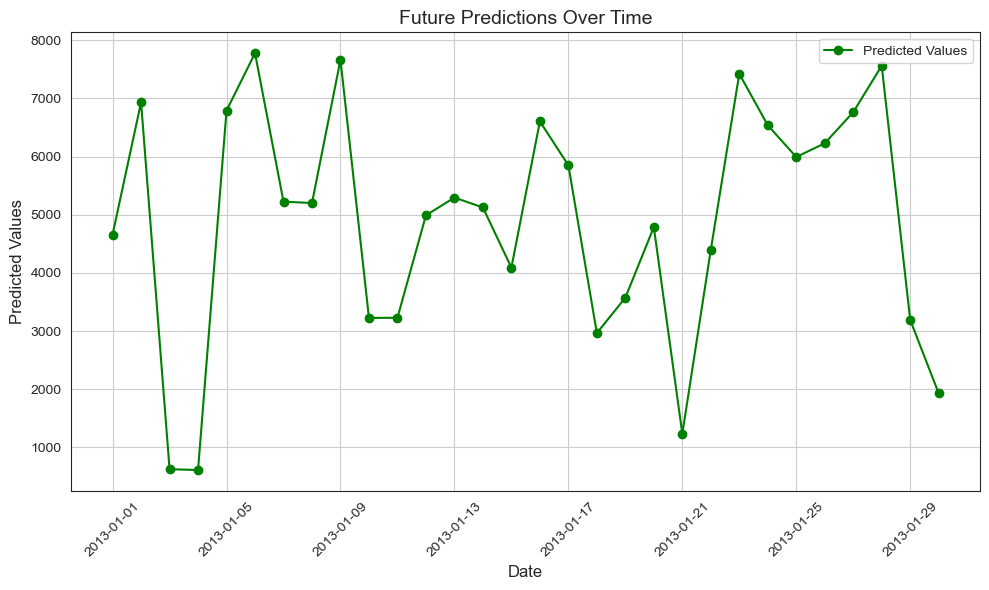

In [299]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Future predictions for the next 30 days
future_dates = pd.date_range(start='2013-01-01', periods=30, freq='D')

# # Example predictions (replace with actual model predictions)
# predictions = np.random.randint(100, 200, size=30)

# Create a DataFrame for easier plotting
future_df = pd.DataFrame({
    'date': future_dates,
    'predictions': prediction
})

# Plotting the predictions over time
plt.figure(figsize=(10, 6))
plt.plot(future_df['date'], future_df['predictions'], marker='o', color='g', label='Predicted Values')
plt.title('Future Predictions Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
